###### À quoi ressemble Jupiter lorsque l'on l'observe depuis une de ses Lunes?

In [1]:
import math
import matplotlib.pyplot as plt

### Données

Sauf indication contraire, toutes les distances sont exprimées en mètres, les durées en secondes, et les masses en kilogrammes. 

In [2]:
rj = 7.0e7 # Rayon de Jupiter
jour = 60*60*24 # Durée d'une journée terrestre en secondes

### Diamètres apparents

Voir `jupyter_lagrange.ipynb` pour plus de détails sur le diamètre apparent.

In [3]:
def diametre_apparent(distance, rayon=rj):
    theta = 2*math.atan2(rayon,distance)
    res = theta/math.pi*180
    return res

In [4]:
def comparaison_lune(theta, description=""):
    fig, ax = plt.subplots(subplot_kw={'aspect': 1})
    plt.xlim(-2, 1 + 2*theta)
    plt.ylim(min(-1.1*theta-.5, -1.2), 1.1*theta)

    jupi = plt.Circle((theta, 0), theta, color='xkcd:salmon')
    ax.add_artist(jupi)
    plt.text(theta, -theta-0.5, description, horizontalalignment='center')
    
    lune = plt.Circle((-1, 0), 0.5, color='xkcd:sky blue')
    ax.add_artist(lune)
    plt.text(-1, -1, 'La Lune depuis la Terre', horizontalalignment='center')

## Durée maximale d'une éclipse

Parfois un satellite passe derière Jupiter par rapport au Soleil. Le Soleil est alors entièrement caché par Jupiter, puisque le diamètre apparent de Jupiter est largement plus grand que celui du Soleil. Connaissant la durée d'une révolution autour de Jupiter et la distance du satellite à Jupiter, on peut en déduire le temps maximal pendant lequel le satellite sera dans l'ombre de Jupiter.

Puique les principaux satellites de Jupiter ont une excentricité très faible, on fait ici l'hypothèse d'orbites circulaires. 

In [5]:
def duree_max_eclipse(theta, orbite):
    """angles en degrés, durées en secondes"""
    duree = orbite/180*theta
    return duree

In [6]:
def sec2h(secondes):
    """Convertir un temps en secondes à un format lisible"""
    heures = int(secondes/3600)
    minutes = (secondes - 3600*heures)/60
    return heures, minutes

# Jupiter vue depuis ses lunes

À quoi ressemble Jupiter vue depuis ses satellites ? Combien de temps durent les éclipses de Jupiter ? Est-ce qu'on y voit les anneaux de Jupiter ?

Les satellites qui se sont formés en même temps que Jupiter ont des orbites à peu près circulaires dans le plan de l'écliptique. Il est possible qu'un corps soit capturé par le champ de pesanteur de Jupiter et se place dans une orbite excentrique hors du plan de l'écliptique autour de Jupiter, mais ce sera alors un astre plus petit et plus irrégulier. 

## Io

Vivre sur Io, ce serait pas tip-top sympa, vu comme le satellite est tiraillé par les marées (il y a plus de 400 volcans causés par les marées à sa surface !), mais imaginons néanmoins que l'on s'y pose. 

In [7]:
dio = 4.22e8 # Distance de Io à Jupiter
oio = 152853 # Durée d'une orbite de Io autour de Jupiter

Le diamètre apparent de Jupiter dans le ciel de Io est de 18.84 degres


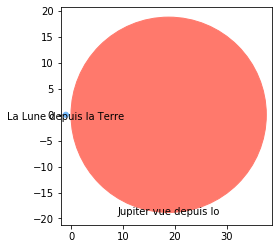

In [8]:
tio = diametre_apparent(dio)
comparaison_lune(tio, "Jupiter vue depuis Io")
print("Le diamètre apparent de Jupiter dans le ciel de Io est de {:.2f} degres".format(tio))

Pour le coup, Jupiter serait vraiment immense dans le ciel.

In [9]:
eio = duree_max_eclipse(tio, oio)
print("Une éclipse sur Io peut durer jusqu'a {:.0f} heures et {:.0f} minutes".format(*sec2h(eio)))

Une éclipse sur Io peut durer jusqu'a 4 heures et 27 minutes


Sachant que l'inclinaison de l'orbite de Io est de $2^\circ$, Io passera dans l'ombre de Jupiter à chaque tour autour de Jupiter. Io est donc plongée dans l'ombre de Jupiter pendant quatre heures et demie tous les deux jours, environ. 

## Europe

Europe est entièrement recouverte d'une épaisse couche de glace d'eau. 

In [10]:
def calculs(distance, orbite, nom):
    print("Il faut {:.1f} jours à {} pour effectuer un tour autour de Jupiter".format(orbite/86400., nom))
    
    theta = diametre_apparent(distance)
    comparaison_lune(theta, "Jupiter depuis {}".format(nom))
    print("Le diamètre apparent de Jupiter dans le ciel de {} est de {:.2f} degres".format(nom, theta))
    
    eclipse = duree_max_eclipse(theta, orbite)
    print("Une éclipse sur {} peut durer jusqu'a {:.0f} heures et {:.0f} minutes".format(nom, *sec2h(eclipse)))

Il faut 3.5 jours à Europe pour effectuer un tour autour de Jupiter
Le diamètre apparent de Jupiter dans le ciel de Europe est de 11.91 degres
Une éclipse sur Europe peut durer jusqu'a 5 heures et 38 minutes


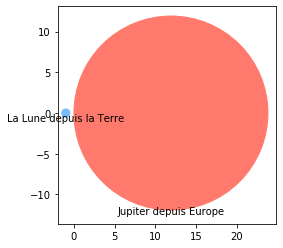

In [11]:
deu = 6.71e8 # Distance d'Europe à Jupiter
oeu = 3.55*jour # Durée d'une orbite d'Europe autour de Jupiter

calculs(deu, oeu, "Europe")

Ce n'est pas très différent de la situation sur Io, en ce qui concerne l'allure de Jupiter dans le ciel. 

## Ganymède



Il faut 7.2 jours à Ganymède pour effectuer un tour autour de Jupiter
Le diamètre apparent de Jupiter dans le ciel de Ganymède est de 7.49 degres
Une éclipse sur Ganymède peut durer jusqu'a 7 heures et 8 minutes


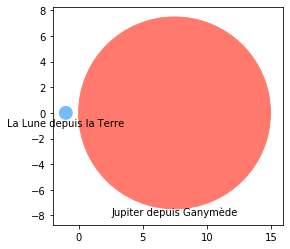

In [12]:
dga = 1.07e9 # Distance de Ganymède à Jupiter
oga = 7.15*jour # Durée d'une orbite de Ganymède autour de Jupiter

calculs(dga, oga, "Ganymède")

## Callisto

Callisto a une atmosphère ténue de gaz carbonique et d'oxygène. 

Il faut 16.7 jours à Callisto pour effectuer un tour autour de Jupiter
Le diamètre apparent de Jupiter dans le ciel de Callisto est de 4.26 degres
Une éclipse sur Callisto peut durer jusqu'a 9 heures et 30 minutes


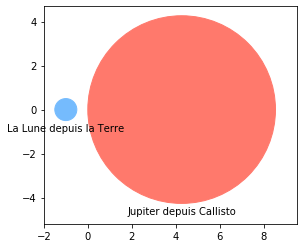

In [13]:
dca = 1.88e9 # Distance de Callisto à Jupiter
oca = 16.7*jour # Durée d'une orbite de Callisto autour de Jupiter

calculs(dca, oca, "Callisto")

La durée maximale d'une éclipse est indiquée pour chaque satellite, mais si l'orbite du satellite est inclinée de quelques degrés par rapport au plan de l'écliptique, alors certaines éclipses pourront être un peu plus courtes.

L'orbite des quatre satellites galiléens (Io, Europe, Ganymède et Callisto) est inclinée d'environ $2^\circ$ par rapport au plan de l'écliptique. C'est moins que le diamètre apparent de Jupiter depuis n'importe laquelle de ces satellites. Par conséquent, ils passent dans l'ombre de Jupiter à chaque orbite. 

## Himalia

Himalia est le 5e satellite de Jupiter en terme de taille. C'est un patatoïde à l'orbite fortement inclinée ($28^\circ$ par rapport à l'écliptique, quand même !) et plutôt excentrique (excentricité = 0.16).

Il faut 250.6 jours à Himalia pour effectuer un tour autour de Jupiter
Le diamètre apparent de Jupiter dans le ciel de Himalia est de 0.70 degres
Une éclipse sur Himalia peut durer jusqu'a 23 heures et 18 minutes


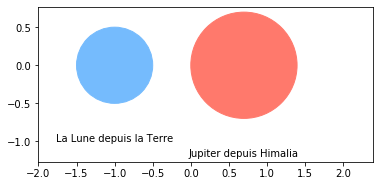

In [14]:
dhi = 1.15e10
ohi = 250.56*jour

calculs(dhi, ohi, "Himalia")

Il faut longtemps à Himalia pour effectuer une orbite autour de Jupiter. Par conséquent, les éclipses totales durent longtemps. Cependant, son plan orbital est très incliné. Les éclipses ne se produisent donc que deux fois environ par année jovienne, soit à peu près une fois toutes les 6 années terrestres. 

## Themisto

C'est un petit patatoïde (8 km de diamètre) à mi-chemin entre les satellites galiléens et Himalia. 

Il faut 129.8 jours à Themisto pour effectuer un tour autour de Jupiter
Le diamètre apparent de Jupiter dans le ciel de Themisto est de 1.09 degres
Une éclipse sur Themisto peut durer jusqu'a 18 heures et 47 minutes


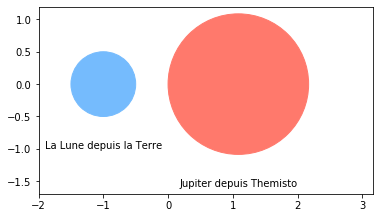

In [15]:
dth = 7.39e9
oth = 129.8*jour

calculs(dth, oth, "Themisto")

L'orbite de Themisto est inclinée de $45^\circ$ par rapport au plan de l'écliptique. La fréquence des éclipses est donc comparable à celle pour Himalia. 

# Titan

Titan est le plus gros satellite du système solaire. Il se trouve en orbite autour de Saturne. Son atmosphère est dense et on trouve des lacs de méthane à sa surface. 

L'orbite de Titan est peu incliné (inclinaison = $2.5^\circ$ par rapport à l'écliptique). Elle passe donc dans l'ombre de Saturne à chaque orbite. 

Il faut 15.9 jours à Titan pour effectuer un tour autour de Saturne
Le diamètre apparent de Saturne dans le ciel de Titan est de 5.46 degres
Une éclipse sur Titan peut durer jusqu'a 11 heures et 35 minutes


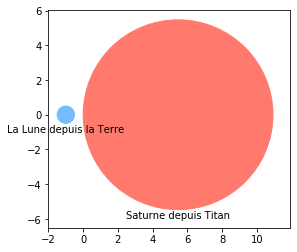

In [16]:
r_sat = 5.82e7 # Rayon de Saturne
o_tit = 15.9*jour # Durée de l'orbite de Titan
d_tit = 1.22e9 # Distance entre Jupiter et Titan

print("Il faut {:.1f} jours à Titan pour effectuer un tour autour de Saturne".format(o_tit/86400.))
    
theta = diametre_apparent(d_tit, r_sat)
comparaison_lune(theta, "Saturne depuis Titan")
print("Le diamètre apparent de Saturne dans le ciel de Titan est de {:.2f} degres".format(theta))

eclipse = duree_max_eclipse(theta, o_tit)
print("Une éclipse sur Titan peut durer jusqu'a {:.0f} heures et {:.0f} minutes".format(*sec2h(eclipse)))

# Khanat

Le Khanat fait le tour de Samayun en 16 jours. On suppose que Samayun a les mêmes propriétés physiques que Saturne.

Le diamètre apparent de Samayun dans le ciel de Khanat est de 4.55 degres


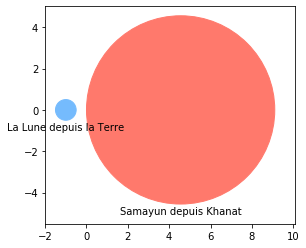

In [19]:
r_samayun = rj
d_khanat = 1760610 * 1e3

theta = diametre_apparent(d_khanat, r_samayun)

comparaison_lune(theta, "Samayun depuis Khanat")
print("Le diamètre apparent de Samayun dans le ciel de Khanat est de {:.2f} degres".format(theta))